In [1]:
import numpy as np
import matplotlib.pyplot as plt

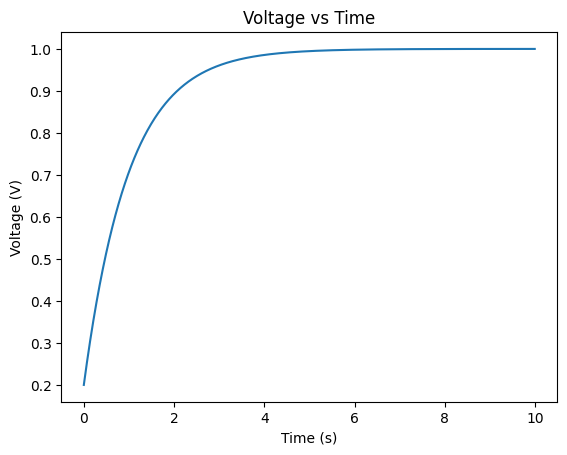

In [2]:
#Question 1-2
def LIF(I, C, R, Vth, Vreset, plot = True):                
    #in which I = input current, C = membrane capacitance, R = membrane resistance
    dt=0.01                      #Set the timestep.
    #num_steps = 1000  ; this is the option to make time steps not as an array, like below, instead you would do v = np.zeros(num_steps)
    V = np.zeros([1000,1])       #Initialize V (where number of time steps = 1000)
    V[0]=0.2;                    #Initial condition.

    for k in range(1000 - 1):       #March forward in time,
        dVdt = (I - V[k] / R) / C
        V[k + 1] = V[k] + dt * dVdt

        if V[k + 1] > Vth:        # Check if the voltage exceeds the threshold
            V[k + 1] = Vreset    # Reset the voltage

        #V[k+1] = V[k] + dt*(I/C) #Update the voltage,
        #if V[k+1] > Vth:         #... and check if the voltage exceeds the threshold.
         #   V[k+1] = Vreset      #... if so, reset the voltage
            
    t = np.arange(0,len(V))*dt   #Define the time axis.
    
    if plot:                     #If the plot flag is on, plot V vs t.
        plt.plot(t,V)
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.title('Voltage vs Time')
        plt.show()

LIF(1.0, 1.0, 1.0, 1.0, 0.0, True) #Reference above, def LIF(I, C, R, Vth, Vreset, plot = True)


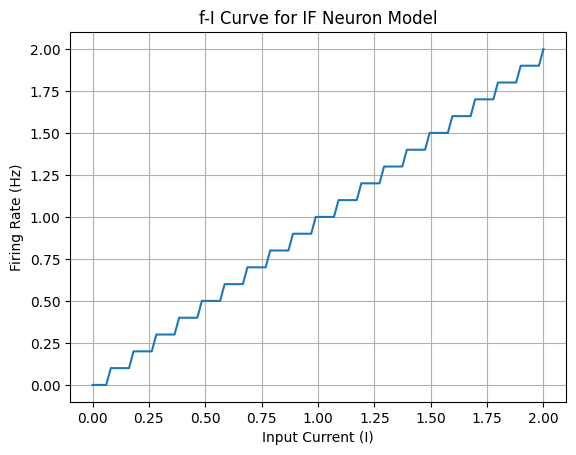

In [3]:
#Question 3
def IF(I, C, plot=False):
    Vth = 1
    Vreset = 0
    dt = 0.01
    V = np.zeros([1000, 1])
    V[0] = 0.2
    spikes = 0  # Initialize the spike count

    for k in range(0, 999):
        V[k + 1] = V[k] + dt * (I / C)
        if V[k + 1] > Vth:
            V[k + 1] = Vreset
            spikes += 1  # Spike detected

    t = np.arange(0, len(V)) * dt
    firing_rate = spikes / (len(t) * dt)  # Calculate firing rate in Hz

    if plot:
        plt.plot(t, V)
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.title(f'IF Neuron Model: I={I}, Firing Rate={firing_rate} Hz')
        plt.grid(True)
        plt.show()

    return firing_rate

# Create a range of input currents and plot the f-I curve
input_currents = np.linspace(0, 2, 100)
firing_rates = []

for I in input_currents:
    firing_rate = IF(I, C=1)
    firing_rates.append(firing_rate)

# Plot the f-I curve
plt.figure()
plt.plot(input_currents, firing_rates)
plt.xlabel('Input Current (I)')
plt.ylabel('Firing Rate (Hz)')
plt.title('f-I Curve for IF Neuron Model')
plt.grid(True)
plt.show()

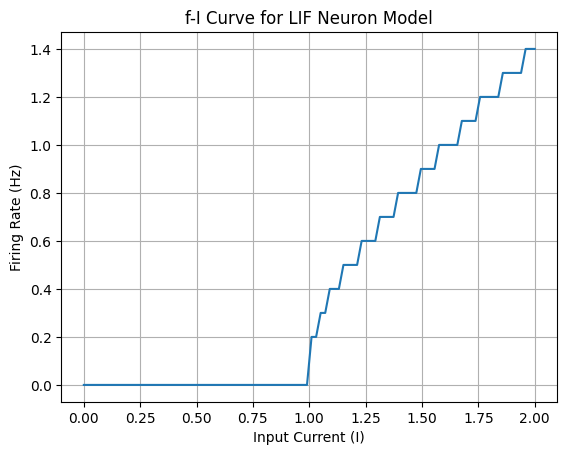

In [4]:
#Question 4
def FLIF(I, C, R, Vth, Vreset, plot=True):
    dt = 0.01
    V = np.zeros([1000, 1])
    V[0] = 0.2
    spikes = 0  # Initialize the spike count

    for k in range(1000 - 1):
        dVdt = (I - V[k] / R) / C
        V[k + 1] = V[k] + dt * dVdt

        if V[k + 1] > Vth:
            V[k + 1] = Vreset
            spikes += 1

    t = np.arange(0, len(V)) * dt
    firing_rate = spikes / (len(t) * dt)

    if plot:
        plt.plot(t, V)
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.title(f'LIF Neuron Model: I={I}, Firing Rate={firing_rate} Hz')
        plt.grid(True)
        plt.show()

    return firing_rate

# Create a range of input currents and plot the f-I curve
input_currents = np.linspace(0, 2, 100)
firing_rates = []

for I in input_currents:
    firing_rate = FLIF(I, C=1, R=1, Vth=1, Vreset=0, plot=False)
    firing_rates.append(firing_rate)

# Plot the f-I curve
plt.figure()
plt.plot(input_currents, firing_rates)
plt.xlabel('Input Current (I)')
plt.ylabel('Firing Rate (Hz)')
plt.title('f-I Curve for LIF Neuron Model')
plt.grid(True)
plt.show()

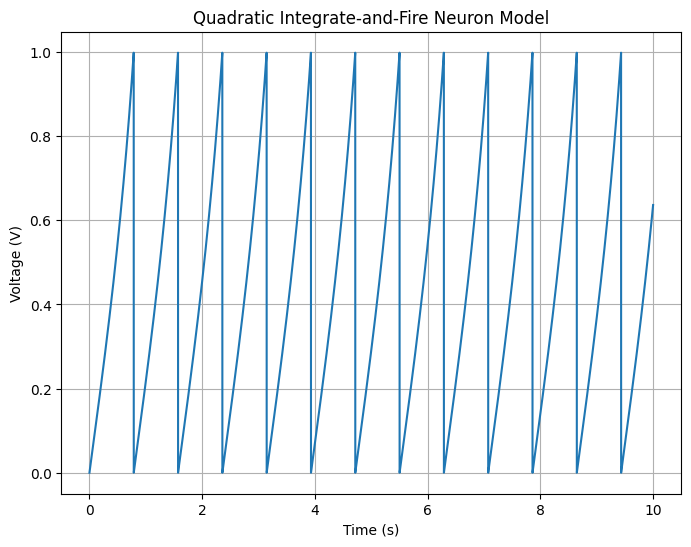

In [6]:
#QUESTION 5 and 6: The quadratic integrate and fire neuron C dV/dt = V^2 + I 
def QIF_neuron(I, C, t_sim, dt, V_threshold):
    num_steps = int(t_sim / dt)
    V = np.zeros(num_steps)
    V[0] = 0.0  # Initial membrane potential

    for step in range(1, num_steps):
        dVdt = (V[step - 1]**2 + I) / C
        V[step] = V[step - 1] + dt * dVdt

        if V[step] >= V_threshold:
            V[step] = 0.0  # Reset membrane potential

    t = np.arange(0, t_sim, dt)

    return t, V

# Parameters
C = 1.0           # Membrane capacitance
V_threshold = 1.0  # Threshold voltage
t_sim = 10.0      # Simulation time (seconds)
dt = 0.001        # Time step (seconds)

# Input current
I = 1.0  # Adjust the input current as needed

# Simulate the IF neuron
t, V = QIF_neuron(I, C, t_sim, dt, V_threshold)

# Plot the voltage response
plt.figure(figsize=(8, 6))
plt.plot(t, V)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Quadratic Integrate-and-Fire Neuron Model')
plt.grid(True)
plt.show()
